In [72]:
import whisper
import qiskit as qs
import qiskit.visualization as qv
import random
import qiskit.quantum_info as qf
from gtts import gTTS
import matplotlib.pyplot as plt

In [ ]:
# def str_to_binary(string):
#     binary_string = ''

#     for char in string:
#         binary_string += bin(ord(char))[2:].zfill(8)

#     return binary_string

In [73]:
model = whisper.load_model("base")
result = model.transcribe("thanks_tuwaiq.mp3")

transcribed_text = result['text'].strip()

print("The message: ", transcribed_text)


/Users/abdullahalshihry/opt/anaconda3/envs/py3_env/lib/python3.10/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


The message:  نحن سعيدون اليوم بعرض مشروعنا لمعسكر علم المعلومات والحوسبة الكمية ونتمنى أن يكون العرض قد حاز على رضاكم


In [74]:

n = 10
qc = qs.QuantumCircuit(n,n)
x = random.choices([0,1], k = n)

print(x)

for i in range(n):
    if x[i] == 1 :
        qc.x(i)
    
alice_b = random.choices([0,1], k = n)

qc.barrier(range(n))


for i in range(n) :
    if alice_b[i] == 1 :
        qc.h(i)
    elif alice_b[i] == 0 :
        qc.x(i)
        
# eve_b = random.choices([0,1], k = n)

# for i in range(n) :
#     if eve_b[i] == 1 :
#         qc.h(i)
#     elif eve_b[i] == 0 :
#         qc.x(i)
        
bob_b = random.choices([0,1], k = n)

for i in range(n) : 
    if bob_b[i] == 1 :
        qc.h(i)
    elif bob_b[i] == 0 :
        qc.x(i)
        


z = []

for i in range(n) :
    if alice_b[i] == bob_b[i] :
        z.append(i)
        
print(z)     

for i in z:
    qc.measure(i,i)

job2 = qs.execute(qc, qs.Aer.get_backend('qasm_simulator'), shots = 1)
result2 = job2.result().get_counts()
print(result2)

s = []
key = list(result2.keys())[list(result2.values()).index(1)]
s.append(key)

s = list(map(int, str(s[0])))
print(s)

p = []
for i in z:
    p.append(s[i])
print("The shared key: ", p)


[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
[0, 1, 4, 5, 7]
{'0000110001': 1}
[0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
The shared key:  [0, 0, 1, 1, 0]


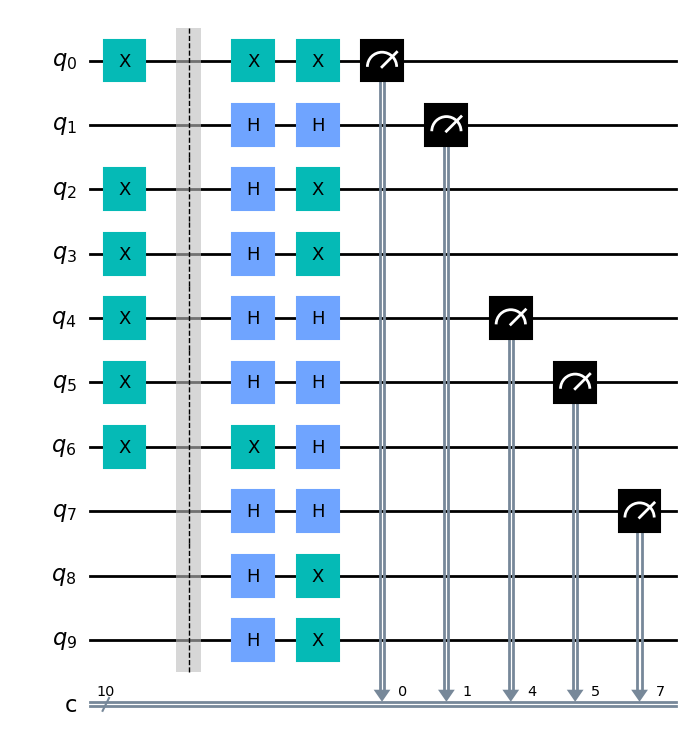

In [75]:
qc.draw('mpl')

In [76]:
binary_key = ''.join(str(i) for i in p)
print(binary_key)
print(type(binary_key))
binary_bytes = bytes([int(binary_key, 2)])
type(binary_bytes)


00110
<class 'str'>


bytes

In [77]:
from cryptography.fernet import Fernet
import base64


while len(binary_bytes) < 32:
    binary_bytes += binary_bytes

key = binary_bytes[:32]

base64_key = base64.urlsafe_b64encode(key)

cipher_suite = Fernet(base64_key)

encrypted_message = cipher_suite.encrypt(transcribed_text.encode())

decrypted_message = cipher_suite.decrypt(encrypted_message)

print("Encrypted message:", encrypted_message)

Encrypted message: b'gAAAAABlJ0UGI1x_uZJs11nGeYczlWNfYjomDU8qbVido7SeLgSyUNaR8qTjNtmtPdOKyaZTH9xxyPyazIuc1yCUEX6eDMmlteXt5KaA-UxsUppphOSLgc0k1sZA29I4vkNRnn3LD0k6YrYB8bSSxkcEwupDkWEJav2um1TFJ0oFvxG_sxjF-PPcf4ikCDs2mjxHSQSCBkRGqjKRuEENSBYtWghDCZm6hTqWJxMrEn8ZWOYMLC0OMRx7bs3zRgVrwK32HA9IVpUWIqI03fnpI3_zeOfK8s71OpJIObJwKauTh9lDRujTv1CRCDBti4oWN5fs3iB7h-69'


In [78]:
print("Decrypted message: ", decrypted_message.decode())

Decrypted message:  نحن سعيدون اليوم بعرض مشروعنا لمعسكر علم المعلومات والحوسبة الكمية ونتمنى أن يكون العرض قد حاز على رضاكم


In [79]:
decrypted_message = decrypted_message.decode()
output_mp3_file = "output.mp3"

tts = gTTS(text=decrypted_message, lang='ar')

tts.save(output_mp3_file)

print(f"Text converted to MP3 and saved to {output_mp3_file}.")


Text converted to MP3 and saved to output.mp3.
